# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import missingno as msno
import math
import scipy as sp
import numpy as np
from scipy.stats import uniform
from sklearn import preprocessing, svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from sklearn.metrics import *
%config InlineBackend.figure_format = 'svg'
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import SGDClassifier

In [9]:
# PARA USO EN DRIVE
#from google.colab import drive
#drive.mount('/content/drive/', force_remount=True )
#path= '/content/drive/My Drive/loan_data.csv'

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [5]:
df=pd.read_csv('loan_data.csv', comment='#')
df

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TARGET   1854 non-null   int64  
 1   LOAN     1854 non-null   int64  
 2   MORTDUE  1854 non-null   float64
 3   VALUE    1854 non-null   float64
 4   YOJ      1854 non-null   float64
 5   DEROG    1854 non-null   float64
 6   DELINQ   1854 non-null   float64
 7   CLAGE    1854 non-null   float64
 8   NINQ     1854 non-null   float64
 9   CLNO     1854 non-null   float64
 10  DEBTINC  1854 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 159.5 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,1854.0,0.166667,0.372779,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,1854.0,19111.758360,11000.345961,1700.000000,12000.000000,17000.000000,23900.000000,89800.000000
MORTDUE,1854.0,76316.051780,46227.026585,5627.000000,48984.750000,67201.000000,93731.500000,399412.000000
VALUE,1854.0,107321.088457,56039.685066,21144.000000,70787.250000,94198.000000,122976.250000,512650.000000
YOJ,1854.0,8.900216,7.552677,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,1854.0,0.187702,0.704882,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,1854.0,0.319849,0.928452,0.000000,0.000000,0.000000,0.000000,10.000000
CLAGE,1854.0,180.300783,84.838308,0.486711,116.970718,174.967815,232.261800,1168.233561
NINQ,1854.0,1.128910,1.664555,0.000000,0.000000,1.000000,2.000000,13.000000
CLNO,1854.0,21.857066,9.510840,0.000000,16.000000,21.000000,27.000000,65.000000



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

3. ¿Qué información (atributos) hay disponible para hacer la predicción?

4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

### 1- Es una base de 1854 de créditos hipotecarios. La variable objetivo o respuesta, es binaria, indicando con un 1 si la persona no pagó su crédito y 0 de otro modo. En el 16% de los casos, las personas no pagaron su crédito. También se dispone de 10 atributos que pueden ayudar a predecir si un crédito entrará en cesación de pagos o nó.
### 2- La Variable objetivo a predecir es TARGET, que asume dos valores posibles:1) No pagó y 0) pagó.
### 3- Para cada deudor, se recolectaron 12 variables: 1) LOAN (monto solicitado) 2) MORTDUE (Cantidad adeudada en la hipoteca existente) 3) VALUE ( Valor actual de la propiedad) 4) YOJ ( años en el actual trabajo) 5) DEROG ( Número de informes negativos) 6) DELINQ (Número de líneas de crédito morosas) 7) CLAGE (Edad de la línea comercial más antigua en meses) 8) NINQ ( Número de líneas de crédito recientes) 9) CLNO ( Número de líneas de crédito) 10) DEBITINC (Ratio deuda ingresos)
### 4- En general la literatura de análisis de riesgo crediticio afirma que hay dos motivos para no pagar un crédito: 1) falta de voluntad de pago y 2) falta de capacidad de pago. La primer característica puede estar asociada a DEROG y la segunda a DEBITINC, YOJ, NINQ, CLNO y DELINQ.

0    1545
1     309
Name: TARGET, dtype: int64

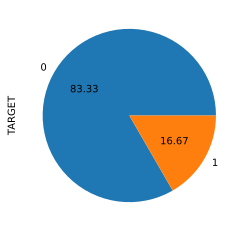

In [27]:
df.groupby('TARGET')['TARGET'].count().plot(kind='pie',y='TARGET',autopct='%.2f');
df.TARGET.value_counts()

### Este grafico de arriba nos muestra que la variable objetivo (nuestra y) esta desbalanceada. Esto puede traer problemas a la hora de crear los modelos

### Antes de comenzar a cargar modelos a nuestro conjunto de datos. Tenemos que normalizar nuestra y. Podemos hacer un oversampling o un undersampling. Elegimos hacer un oversampling ya que sino nos quedabamos con pocos datos.

In [17]:
X = df.drop('TARGET',axis=1)
y = df.TARGET

from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler(sampling_strategy=1)
X, y = oversampling.fit_resample(X, y)

0    1545
1    1545
Name: TARGET, dtype: int64

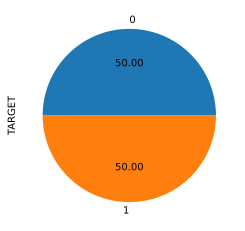

In [28]:
y.value_counts().plot.pie(autopct='%.2f');
y.value_counts()

### TRAIN - TEST - SPLIT

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Fiteado y Transformado. 

In [31]:
power= PowerTransformer(method='yeo-johnson')
X_train=power.fit_transform(X_train)
X_test=power.fit_transform(X_test)

### Escalado

In [32]:
normalizer= preprocessing.StandardScaler()
X_train=normalizer.fit_transform(X_train)
X_test=normalizer.fit_transform(X_test)

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

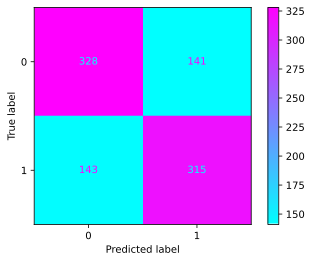

 
        || Reporte de Clasificacion SGDClassifier ||
 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       469
           1       0.69      0.69      0.69       458

    accuracy                           0.69       927
   macro avg       0.69      0.69      0.69       927
weighted avg       0.69      0.69      0.69       927



In [47]:
model = SGDClassifier(loss='hinge', random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plot_confusion_matrix(model,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de Clasificacion SGDClassifier ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

### Nuestro modelo tiene una precision del 0.70, significa que precide correctamente a un deudor el 70% de las veces.   
### Nuestro modelo tiene un recall del 0.69, significa que identifica correctamente al 70% de los deudores.
### Aunque el precision y el recall parecen metricas iguales, no lo son. Y es muy importante conocer su diferencia. Mas cuando usamos modelos de machine learning para predecir posibles enfermedades, y otros tantos de casos donde podemos excluir a personas injustamente.

### Aqui arriba hicimos un reporte de clasificacion con SGDClassifier. 
### Que significa precision? Es la proporción de identificaciones positivas que fueron realmente correctas.
### Que significa recall? Es la proporción de positivos reales que se identificó correctamente.
### La puntuación F1 combina el precisión y el recall de un clasificador en una sola métrica tomando su media. Se utiliza principalmente para comparar el rendimiento de dos clasificadores. Supongamos que el clasificador A tiene un mayor recall y el clasificador B tiene un mayor precisión. En este caso, las puntuaciones F1 de ambos clasificadores pueden utilizarse para determinar cuál produce mejores resultados.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [52]:
# Buscamos distintas combinaciones de parámetros de regularización ,
# métodos de clasificación (SVM y Perceptron) y tasas de aprendizaje
model2 = SGDClassifier(eta0=1, random_state=0)
param_grid = {
    'loss': ['hinge', 'perceptron'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5],
    'learning_rate': ['constant', 'adaptive']}
cv = GridSearchCV(model2, param_grid, scoring='accuracy', cv=3)
cv.fit(X_train, y_train);
print('Mejores parametros:',cv.best_params_)
print('Mejor Score:',cv.best_score_)

Mejores parametros: {'alpha': 0.001, 'learning_rate': 'adaptive', 'loss': 'hinge'}
Mejor Score: 0.7142857142857143


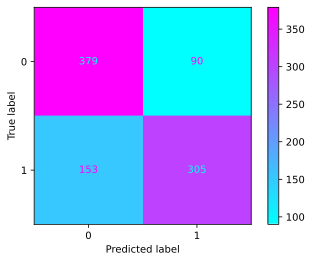

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       469
           1       0.77      0.67      0.72       458

    accuracy                           0.74       927
   macro avg       0.74      0.74      0.74       927
weighted avg       0.74      0.74      0.74       927



In [51]:
modelo_final = SGDClassifier(loss='hinge', random_state=0, alpha=0.001, learning_rate='adaptive',eta0=1)
modelo_final.fit(X_train,y_train)
y_pred=modelo_final.predict(X_test)
plot_confusion_matrix(modelo_final,X_test,y_test,cmap='cool')
plt.show()
print(metrics.classification_report(y_test,y_pred))

### Aqui arriba aplicamos un GridSearchCV para encontrar los mejores parametros a nuestro modelo de SGD. Esto significa que primero va iterando entre diferentes conjuntos de datos para train y para test; como asi tambien iterando diferentes hiperparametros de la funcion (SGD) para luego dar con los hiperparametros que mejor se ajusten a nuestros datos y asi tener valores de prediccion mejores.

### Nuestro modelo tiene una precision del 0.71, significa que precide correctamente a un deudor el 71% de las veces.   
### Nuestro modelo tiene un recall del 0.81, significa que identifica correctamente al 70% de los deudores.

### Aunque el precision y el recall parecen metricas iguales, no lo son. Y es muy importante conocer su diferencia. Mas cuando usamos modelos de machine learning para predecir posibles enfermedades, y otros tantos de casos donde podemos excluir a personas injustamente.

### Aqui arriba hicimos un reporte de clasificacion con SGDClassifier. 
### Que significa precision? Es la proporción de identificaciones positivas que fueron realmente correctas.
### Que significa recall? Es la proporción de positivos reales que se identificó correctamente.
### La puntuación F1 combina el precisión y el recall de un clasificador en una sola métrica tomando su media. Se utiliza principalmente para comparar el rendimiento de dos clasificadores. Supongamos que el clasificador A tiene un mayor recall y el clasificador B tiene un mayor precisión. En este caso, las puntuaciones F1 de ambos clasificadores pueden utilizarse para determinar cuál produce mejores resultados.

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


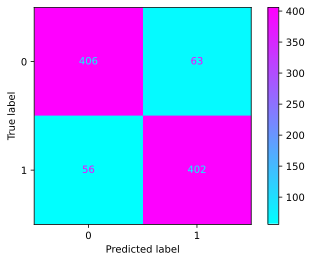

 
        || Reporte de KNeighborsClassifier ||
 
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       469
           1       0.86      0.88      0.87       458

    accuracy                           0.87       927
   macro avg       0.87      0.87      0.87       927
weighted avg       0.87      0.87      0.87       927



In [53]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
plot_confusion_matrix(knn,X_test,y_test,cmap='cool')
plt.show()
print(' ')
print('        || Reporte de KNeighborsClassifier ||')
print(' ')
print(metrics.classification_report(y_test,y_pred))

### Nuestro modelo tiene una precision del 0.88, significa que precide correctamente a un deudor el 88% de las veces.   
### Nuestro modelo tiene un recall del 0.87, significa que identifica correctamente al 87% de los deudores.

### Aunque el precision y el recall parecen metricas iguales, no lo son. Y es muy importante conocer su diferencia. Mas cuando usamos modelos de machine learning para predecir posibles enfermedades, y otros tantos de casos donde podemos excluir a personas injustamente.

### Aqui arriba hicimos un reporte de clasificacion con KNeighborsClassifier. 
### Que significa precision? Es la proporción de identificaciones positivas que fueron realmente correctas.
### Que significa recall? Es la proporción de positivos reales que se identificó correctamente.
### La puntuación F1 combina el precisión y el recall de un clasificador en una sola métrica tomando su media. Se utiliza principalmente para comparar el rendimiento de dos clasificadores. Supongamos que el clasificador A tiene un mayor recall y el clasificador B tiene un mayor precisión. En este caso, las puntuaciones F1 de ambos clasificadores pueden utilizarse para determinar cuál produce mejores resultados.

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [39]:
knn=KNeighborsClassifier()
param_dist={'n_neighbors':sp.stats.randint(1,10),
           'weights':['uniform','distance'],
           'leaf_size':sp.stats.randint(1,10),
           'algorithm':['auto','kd_tree']}
model=RandomizedSearchCV(knn,param_dist,n_iter=10,cv=5,return_train_score=True)
model.fit(X_train,y_train)
print('Mejores parametros:',model.best_params_)
print('Mejor Score:',model.best_score_)

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 8, 'n_neighbors': 2, 'weights': 'distance'}
Mejor Score: 0.9653333761012745


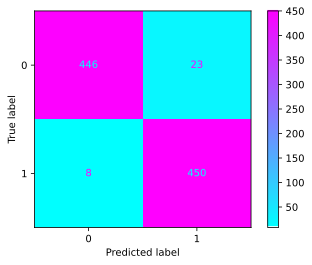

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       469
           1       0.95      0.98      0.97       458

    accuracy                           0.97       927
   macro avg       0.97      0.97      0.97       927
weighted avg       0.97      0.97      0.97       927



In [41]:
neigh=KNeighborsClassifier(n_neighbors=2,algorithm='auto',leaf_size=8,weights='distance')
neigh.fit(X_train,y_train)
y_pred=neigh.predict(X_test)
plot_confusion_matrix(neigh,X_test,y_test,cmap='cool')
plt.show()
print(metrics.classification_report(y_test,y_pred))

### Aqui arriba aplicamos un RandomizedSearchCV para encontrar los mejores parametros a nuestro modelo de KNeighborsClassifier. Esto significa que primero va iterando entre diferentes conjuntos de datos para train y para test; como asi tambien iterando diferentes hiperparametros de la funcion (KNeighborsClassifier) para luego dar con los hiperparametros que mejor se ajusten a nuestros datos y asi tener valores de prediccion mejores.

### Nuestro modelo tiene una precision del 0.98, significa que precide correctamente a un deudor el 98% de las veces.   
### Nuestro modelo tiene un recall del 0.95, significa que identifica correctamente al 95% de los deudores.

### Aunque el precision y el recall parecen metricas iguales, no lo son. Y es muy importante conocer su diferencia. Mas cuando usamos modelos de machine learning para predecir posibles enfermedades, y otros tantos de casos donde podemos excluir a personas injustamente.

### Aqui arriba hicimos un reporte de clasificacion con KNeighborsClassifier. 
### Que significa precision? Es la proporción de identificaciones positivas que fueron realmente correctas.
### Que significa recall? Es la proporción de positivos reales que se identificó correctamente.
### La puntuación F1 combina el precisión y el recall de un clasificador en una sola métrica tomando su media. Se utiliza principalmente para comparar el rendimiento de dos clasificadores. Supongamos que el clasificador A tiene un mayor recall y el clasificador B tiene un mayor precisión. En este caso, las puntuaciones F1 de ambos clasificadores pueden utilizarse para determinar cuál produce mejores resultados.